<a href="https://colab.research.google.com/github/Shruu13/projects/blob/main/WhatsappchatAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [5]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [6]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [8]:
import re

In [13]:
import parser


In [16]:
# from google.colab import files
# uploaded = files.upload()
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'WhatsApp Chat with Sakshi.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                data.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [22]:
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(30)


,Date,Time,Author,Message
5268,2022-11-13,11:54 AM,Sakshi,Mummi ko bola hai aapki meeting hai
5269,2022-11-13,12:08 PM,Shruti,👍
5270,2022-11-13,12:08 PM,Shruti,Kab wese ?
5271,2022-11-13,12:36 PM,Sakshi,Abhi phone na uthane ka reason
5272,2022-11-13,1:20 PM,Shruti,Ohh 🙃
5273,2022-11-13,4:08 PM,None,Sakshi: https://youtube.com/shorts/yRAiBMe8SoI...
5274,2022-11-13,4:51 PM,Shruti,Tu gyi party pe ?
5275,2022-11-13,4:52 PM,Sakshi,Hnji ja rhi hu
5276,2022-11-13,4:56 PM,Shruti,Good
5277,2022-11-13,4:56 PM,Shruti,Enjoy 🤗


In [21]:
print(df.info())
print(df.Author.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     5298 non-null   datetime64[ns]
 1   Time     5298 non-null   object        
 2   Author   4769 non-null   object        
 3   Message  5298 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 165.7+ KB
None
['Sakshi' None 'Shruti']


In [23]:
total_messages = df.shape[0]
print(total_messages)

5298


In [24]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

1752


In [35]:
import emoji
import regex
""
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any( emoji.distinct_emoji_list(word)):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

735


In [36]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Aman and Sapna")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Aman and Sapna
Total Messages:  5298
Number of Media Shared:  1752
Number of Emojis Shared 735
Number of Links Shared 638


In [38]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Shruti", "Sakshi"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Shruti -
Messages Sent 1179
Average Words per message 6.0949957591178965
Media Messages Sent 866
Emojis Sent 312
Links Sent 94
Stats of Sakshi -
Messages Sent 1838
Average Words per message 2.927094668117519
Media Messages Sent 886
Emojis Sent 355
Links Sent 20


In [39]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😂', 98)
('👀', 72)
('👍🏻', 47)
('❤️', 45)
('🥳', 33)
('👍', 30)
('😍', 24)
('🥺', 23)
('🔥', 23)
('💯', 16)
('✨', 14)
('➖', 14)
('💜', 13)
('👏🏻', 11)
('😘', 10)
('🤦🏻\u200d♀️', 9)
('⚡', 8)
('🙏🏻', 8)
('🤗', 8)
('🙃', 8)
('💡', 7)
('🙄', 7)
('🌝', 7)
('🤩', 6)
('😶', 5)
('💎', 5)
('😺', 5)
('😱', 5)
('😒', 5)
('🤧', 4)
('👽', 4)
('😳', 4)
('😁', 4)
('😭', 4)
('🤣', 4)
('🦖', 4)
('\U0001faf6🏻', 4)
('🤮', 4)
('😅', 3)
('🌻', 3)
('🤦\u200d♀️', 3)
('💖', 3)
('\U0001fae0', 3)
('😑', 3)
('😡', 3)
('💙', 2)
('🙌🏻', 2)
('💗', 2)
('😏', 2)
('🤘', 2)
('🌈', 2)
('🌸', 2)
('🤷🏻\u200d♀️', 2)
('🌟', 2)
('🤍', 2)
('😐', 2)
('🤤', 2)
('🌚', 2)
('👿', 2)
('🦀', 2)
('\U0001faf0🏻', 2)
('\U0001fae3', 2)
('\U0001fae1', 2)
('😎', 2)
('😞', 2)
('🤯', 2)
('🤭', 2)
('\U0001f972', 2)
('🙏', 2)
('🧈', 1)
('😉', 1)
('🥭', 1)
('🍡', 1)
('🔫', 1)
('✅', 1)
('💈', 1)
('💝', 1)
('😇', 1)
('👺', 1)
('🦊', 1)
('💀', 1)
('💫', 1)
('🌼', 1)
('😣', 1)
('🧐', 1)
('🥰', 1)
('😔', 1)
('📱', 1)
('✊🏻', 1)
('🎯', 1)
('😬', 1)
('🙂', 1)
('🧿', 1)
('😾', 1)
('🧉', 1)
('🐢', 1)
('🐖', 1)
('💚', 1)
('🤪', 1)
('\U00

There are 112276 words in all the messages.


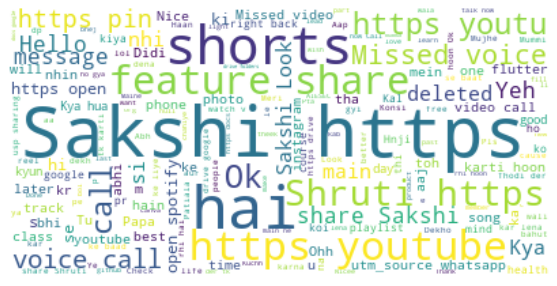

In [40]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Shruti


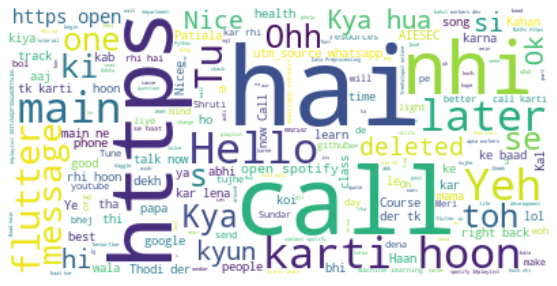

Author name Sakshi


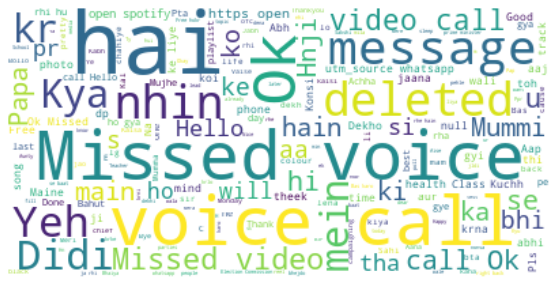

In [42]:
l = ["Shruti", "Sakshi"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()